<h3>Problem statement</h3>
<p>
The objective of this Case is to Predication of bike rental count on daily based on the
environmental and seasonal settings.
</p>



In [1]:
#importing all the libraries 
#pandas  => for dataframe manipulation
#seaborn => wriiten on top of matplotlib for data visualization
#random  => for random number generator
#sklearn => for machine learning algorithms
#statsmodel => for performing statistical tests like VIF,Rsquare,Adjusted Rsquare


import pandas as pd
import seaborn as sns
import numpy as np
import random

from math import radians, cos, sin, asin, sqrt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

from patsy import dmatrices
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt

random.seed(113)


In [2]:
df = pd.read_csv("day.csv");

In [3]:
#Let us check the shape of dataset
print(df.shape)

(731, 16)


In [4]:
"""
We have 731 rows and 16 columns in dataset
"""
#Let us have some information about the dataframe like null values and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
"""
For better understanding of data mapping numerical categories in to their respective strings
"""
# d = {1 : 'springer', 2:'summer' ,3:'fall',4:'winter'}
# df['season'] = df['season'].map(d)


'\nFor better understanding of data mapping numerical categories in to their respective strings\n'

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
df['season'].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [10]:

df['yr'].value_counts()
"""
0 here means 2011
1 here means 2012
you can map as above for better understanding
"""

'\n0 here means 2011\n1 here means 2012\nyou can map as above for better understanding\n'

In [11]:
"""
For better understanding of data mapping numerical categories in to their respective strings
"""


# d = {1:'jan',
#      2:'feb',
#      3:'march',
#      4:'april',
#      5:'may',
#      6:'june',
#      7:'july',
#      8:'aug',
#      9:'sep',
#      10:'oct',
#      11:'nov',
#      12:'dec'
#     }
# df['mnth'] = df['mnth'].map(d)

'\nFor better understanding of data mapping numerical categories in to their respective strings\n'

In [12]:
df['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64

In [13]:

df['holiday'].value_counts()

"""
0 here means No holiday
1 here means holiday
"""


'\n0 here means No holiday\n1 here means holiday\n'

In [14]:
"""
For better understanding of data mapping numerical categories in to their respective strings
"""

# d = {
#     0:'sun',
#     1:'mon',
#     2:'tue',
#     3:'wed',
#     4:'thu',
#     5:'fri',
#     6:'sat',
# }

# df['weekday'] = df['weekday'].map(d)

'\nFor better understanding of data mapping numerical categories in to their respective strings\n'

In [15]:

"""
For better understanding of data mapping numerical categories in to their respective strings
"""
# d = {
#     1:'clear_or_few',
#     2:'mist_and_cloudy',
#     3:'lightrain_or_snow',
#     4:'heavy_rain'
# }

# df['weathersit'] = df['weathersit'].map(d)

'\nFor better understanding of data mapping numerical categories in to their respective strings\n'

In [16]:
df['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [17]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


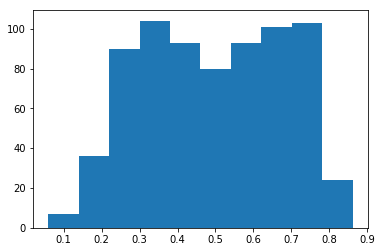

In [18]:
# ax = sns.distplot(df['temp'])
ax = plt.hist(df['temp'])
plt.show()

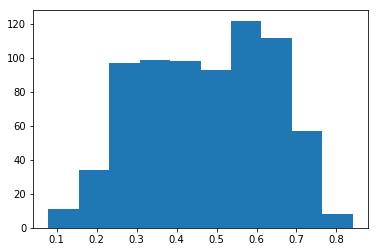

In [19]:
ax = plt.hist(df['atemp'])
plt.show()

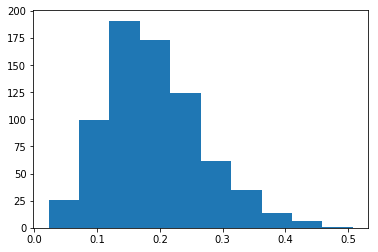

In [20]:
ax = plt.hist(df['windspeed'])
plt.show()

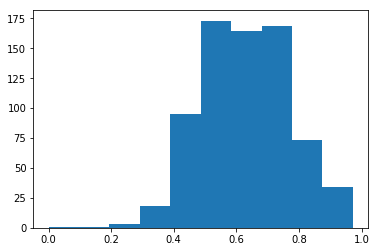

In [21]:
# ax = sns.distplot(df['hum'])
ax = plt.hist(df['hum'])
plt.show()

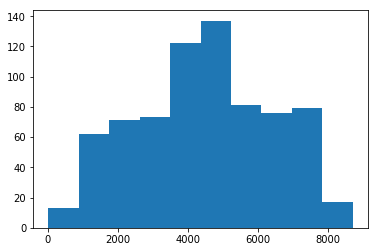

In [22]:
# ax = sns.distplot(df['cnt'])
ax = plt.hist(df['cnt'])
plt.show()

In [23]:
# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(df, vars=["temp", "atemp","windspeed",'hum','cnt'])
# plt.show()

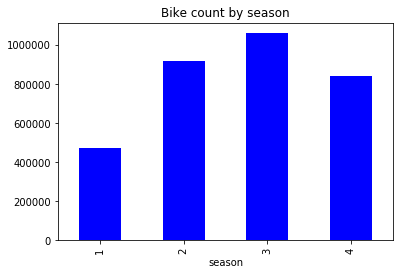

In [24]:
"""
visualizing all columns one by one to take insights from the data with respect to target variable count
"""

# cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

df.groupby('season')['cnt'].sum().plot.bar(color = 'b');
plt.title('Bike count by season')
plt.show()

In [25]:
##As we can clearly see in season 2 and 3 bike rental count increases as compared to 1 and 4

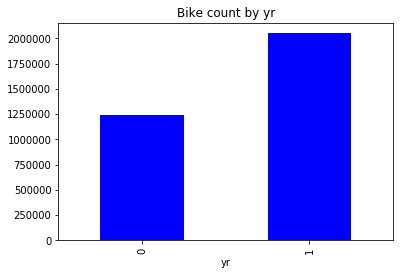

In [26]:
df.groupby('yr')['cnt'].sum().plot.bar(color = 'b');
plt.title('Bike count by yr');
plt.show()

In [27]:
##As from the graph we can say that the  growth of the requirements of bike increases in 2012 as compared to 2011

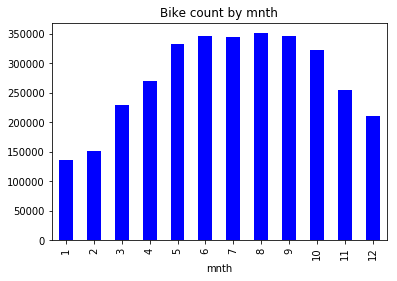

In [28]:
df.groupby('mnth')['cnt'].sum().plot.bar(color = 'b');
plt.title('Bike count by mnth')
plt.show()

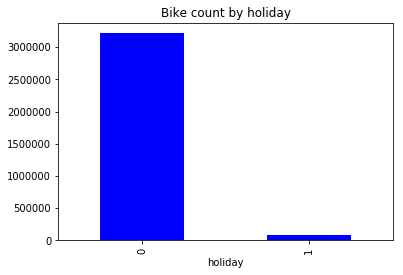

In [29]:
df.groupby('holiday')['cnt'].sum().plot.bar(color = 'b');
plt.title('Bike count by holiday');
plt.show()

In [30]:
## As expected the requirement of bike is more on workdays rather than on holidays

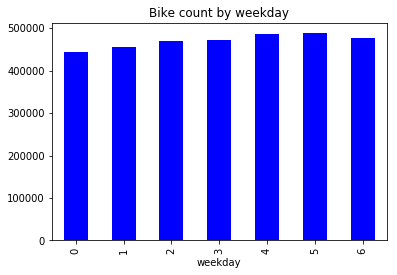

In [31]:
df.groupby('weekday')['cnt'].sum().plot.bar(color = 'b');
plt.title('Bike count by weekday')
plt.show()

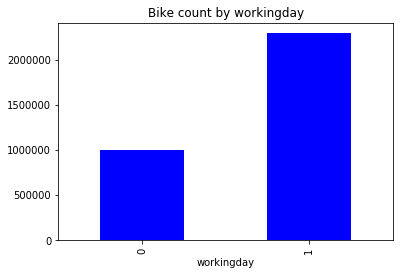

In [32]:
df.groupby('workingday')['cnt'].sum().plot.bar(color = 'b');
plt.title('Bike count by workingday')
plt.show()

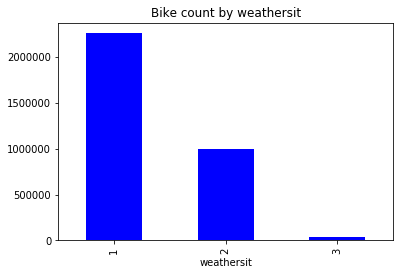

In [33]:
df.groupby('weathersit')['cnt'].sum().plot.bar(color = 'b');
plt.title('Bike count by weathersit');
plt.show()

In [34]:
##Let us do some testing on numerical variables for multicollinearity we will only use temp,hum,atemp,
#windspeed as these are only numerical variable 

"""
We will use variance inflation factor to detect the multicollinearity
"""
df_subset = df[['cnt','temp','hum','atemp','windspeed']].dropna()
#subset the dataframe


In [35]:
features = ''
for column in df_subset.columns:
    
    if(column != 'cnt'):
        features +=  '+'+column
        print(features) 
        y, X = dmatrices('cnt ~'+features , df, return_type='dataframe')
        vif = pd.DataFrame()
        vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif["features"] = X.columns
        """
        tabulating the vif value of differet columns in a variable
        """
        print(vif.round(1))
    
    
   
    

+temp
   VIF Factor   features
0         8.3  Intercept
1         1.0       temp
+temp+hum
   VIF Factor   features
0        25.2  Intercept
1         1.0       temp
2         1.0        hum
+temp+hum+atemp
   VIF Factor   features
0        26.9  Intercept
1        61.0       temp
2         1.0        hum
3        61.2      atemp
+temp+hum+atemp+windspeed
   VIF Factor   features
0        45.6  Intercept
1        63.0       temp
2         1.1        hum
3        63.6      atemp
4         1.1  windspeed


In [36]:
# # %%capture
# #gather features

# y, X = dmatrices('cnt ~'+features , df, return_type='dataframe')

In [37]:
# # For each X, calculate VIF and save in dataframe
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns

In [38]:
# """
# tabulating the vif value of differet columns in a variable
# """
# vif.round(1)

<p>As from the above table we can say thet temp and  atemp has very high value of VIF so they both are 
explaining the same variance of data so we can drop one of the other</p>

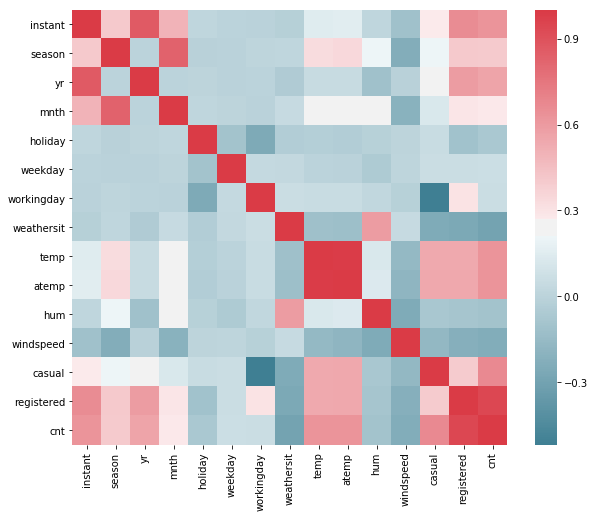

In [39]:
"""
Also displaying correlation plot to detect the collinearity in data 
"""
f, ax = plt.subplots(figsize=(10, 8))
corr =df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

<h4>As from the correlation plot we can see there is high relation between</h4>
<ul>
<li>1.temp and atemp </li>
<li> casual ,registered,cnt</li>
<ul>

So we can remove on of the two variable from temp and atemp

and also cnt is summation of registered and casual so we can just keep cnt as it contains summation value of two variables and are highly correlated

In [40]:
df  = df.drop(['instant','registered','casual','temp','dteday'],axis=1)

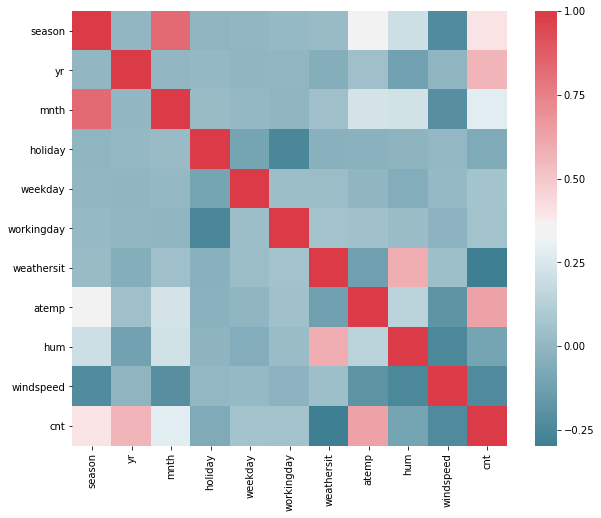

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
corr =df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [42]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600


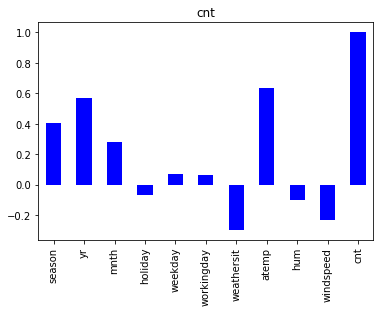

In [43]:
corrs = df.corr()
corrs['cnt'].plot.bar(color = 'b');
plt.title('cnt');
plt.show()

In [44]:
#As we cannot feed categorical data in some regression models like linear regression 
#so we will convert the data in to numerical one.
#converting season,weathersit,yr,mnth
#We are not required to convert working day or holiday as they cotain value only zero or one
cat_columns = ['season','weathersit','yr','mnth']
df = pd.get_dummies(df, prefix_sep="__",
                               columns=cat_columns)

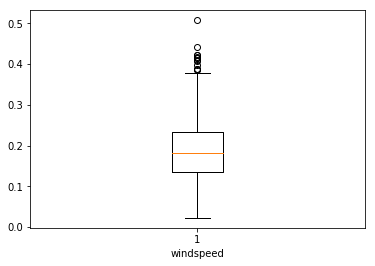

In [45]:
plt.boxplot(df['windspeed'])
plt.xlabel('windspeed')
plt.show()

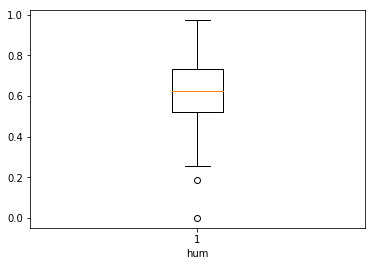

In [46]:
plt.boxplot(df['hum'])
plt.xlabel('hum')
plt.show()

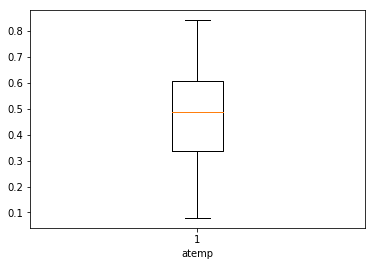

In [47]:
plt.boxplot(df['atemp'])
plt.xlabel('atemp')
plt.show()

In [48]:
#Detect & Delete Outliers
cnames = ["atemp","hum","windspeed"]
for i in cnames :
    print (i)
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    df =df.drop(df[df.loc[:,i] < min].index)
    df = df.drop(df[df.loc[:,i] > max].index)


atemp
-0.06829675
1.01474125
hum
0.20468725
1.04552125
windspeed
-0.012431
0.380585


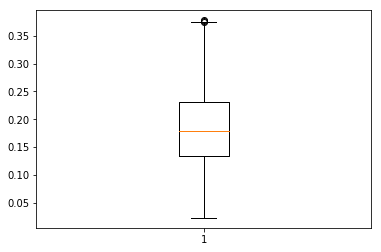

In [49]:
plt.boxplot(df['windspeed'])
plt.show()

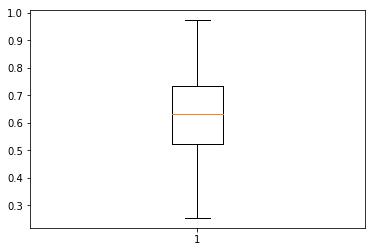

In [50]:
plt.boxplot(df['hum'])
plt.show()

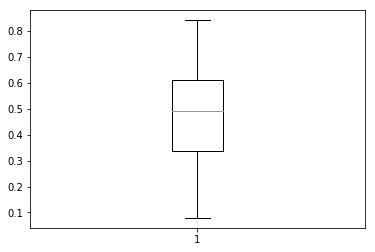

In [51]:
plt.boxplot(df['atemp'])
plt.show()

In [52]:
df.head()

,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season__1,season__2,season__3,...,mnth__3,mnth__4,mnth__5,mnth__6,mnth__7,mnth__8,mnth__9,mnth__10,mnth__11,mnth__12
0,0,6,0,0.363625,0.805833,0.160446,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.353739,0.696087,0.248539,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0.189405,0.437273,0.248309,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,0.212122,0.590435,0.160296,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,0.229270,0.436957,0.186900,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
"""
We can split our data in 80:20
where 80% data will be our training data and 20% data will be our test data
"""
train, test = train_test_split(df, test_size=0.2)

In [54]:
train.head()

,holiday,weekday,workingday,atemp,hum,windspeed,cnt,season__1,season__2,season__3,...,mnth__3,mnth__4,mnth__5,mnth__6,mnth__7,mnth__8,mnth__9,mnth__10,mnth__11,mnth__12
725,0,3,1,0.220333,0.823333,0.316546,441,1,0,0,...,0,0,0,0,0,0,0,0,0,1
559,0,5,1,0.667933,0.485833,0.080850,7499,0,0,1,...,0,0,0,0,1,0,0,0,0,0
344,0,0,0,0.253154,0.490000,0.066542,2743,0,0,0,...,0,0,0,0,0,0,0,0,0,1
351,0,0,0,0.245579,0.586250,0.169779,2431,0,0,0,...,0,0,0,0,0,0,0,0,0,1
404,0,4,1,0.261988,0.562083,0.194037,3830,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X_train = train.drop(['cnt'],axis = 1)
Y_train = train[['cnt']]


X_test = test.drop(['cnt'],axis = 1)
Y_test = test[['cnt']]

In [56]:
X_train.head()

,holiday,weekday,workingday,atemp,hum,windspeed,season__1,season__2,season__3,season__4,...,mnth__3,mnth__4,mnth__5,mnth__6,mnth__7,mnth__8,mnth__9,mnth__10,mnth__11,mnth__12
725,0,3,1,0.220333,0.823333,0.316546,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
559,0,5,1,0.667933,0.485833,0.080850,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
344,0,0,0,0.253154,0.490000,0.066542,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
351,0,0,0,0.245579,0.586250,0.169779,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
404,0,4,1,0.261988,0.562083,0.194037,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
Y_train.head()

,cnt
725,441
559,7499
344,2743
351,2431
404,3830


In [58]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    
    
    return mape

In [59]:
def linear_regression(x_train,y_train,x_test,y_test):
    regressor = LinearRegression()  
    regressor = regressor.fit(x_train, y_train) #training the algorithm
    y_pred = regressor.predict(x_train)
    rmse_train =  sqrt(mean_squared_error(y_train, y_pred))
    
#     print("rmse for simple linear regression for train data",rmse_train)
    y_pred_test = regressor.predict(x_test)
    rmse_test =  sqrt(mean_squared_error(y_test, y_pred_test))
    mape_test = MAPE(y_test, y_pred_test)
    mape_train = MAPE(y_train, y_pred)
    
   
    SS_Residual = sum((y_test.values-y_pred_test)**2)
    
   
    SS_Total = sum((y_test.values-np.mean(y_test.values))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print("R squared",r_squared) 
    print("adjusted r square",adjusted_r_squared)
    #
#     print("rmse for simple linear regression for test data",rmse_test)
    return {'rmse_train':rmse_train,'rmse_test':rmse_test,'mape_test':mape_test,'mape_train':mape_train}

In [60]:
linear_regression(X_train,Y_train,X_test,Y_test)

R squared [ 0.83465203]
adjusted r square [ 0.79616586]


{'mape_test': cnt    17.159055
 dtype: float64, 'mape_train': cnt    45.501193
 dtype: float64, 'rmse_test': 754.2829591045272, 'rmse_train': 761.5231152641477}

In [61]:
def decision_trees(x_train,y_train,x_test,y_test):
    clf =  DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)
    
    """
    We will be using GridSearchCV for hyperperameter tunning
    """
    param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
    
    grid_cv_dtm = GridSearchCV(clf, param_grid, cv=5)
    

    grid_cv_dtm = grid_cv_dtm.fit(x_train,y_train)

#     clf = clf.fit(x_train, y_train)
    y_pred_tree = grid_cv_dtm.predict(x_train)
    rmse_train =  sqrt(mean_squared_error(y_train, y_pred_tree))
#     print("rmse for decision trees for train data",rmse)
    y_pred_tree_test = grid_cv_dtm.predict(x_test)
    rmse_test =  sqrt(mean_squared_error(y_test,y_pred_tree_test))
    
    y_test = np.reshape(y_test,(y_test.shape[0],1))
    y_pred_tree_test = np.reshape( y_pred_tree_test,( y_pred_tree_test.shape[0],1))
    
    mape_test = MAPE(Y_test, y_pred_tree_test)
    
    print("R-Squared::{}".format(grid_cv_dtm.best_score_)
         )
    
# #for rsquare and adjusted
#     SS_Residual = sum((y_test.values-y_pred_tree_test)**2)
    
   
#     SS_Total = sum((y_test.values-np.mean(y_test.values))**2)
#     r_squared = 1 - (float(SS_Residual))/SS_Total
#     adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#     print("R squared",r_squared) 
#     print("adjusted r square",adjusted_r_squared)


# ##############
    
#     print("rmse for decision trees for test data",rmse)
    print(mape_test)
    return {'rmse_train':rmse_train,'rmse_test':rmse_test}


In [62]:
decision_trees_rmse = decision_trees(X_train,Y_train,X_test,Y_test)
print("decison trees",decision_trees_rmse)

R-Squared::0.7672579760773294
cnt    20.386957
dtype: float64
decison trees {'rmse_train': 789.494127471757, 'rmse_test': 808.3741667091903}


In [63]:
def knn_model(x_train,y_train,x_test,y_test,n):
    neigh = KNeighborsRegressor(n_neighbors=n)
    neigh = neigh.fit(X_train,Y_train)
    y_pred_tree_knn = neigh.predict(X_train)
    rmse_train =  sqrt(mean_squared_error(Y_train,y_pred_tree_knn))
#     print("rmse of knn for train data for {} neighbour is {}".format(diff_neighbours[i],rmse))
    y_pred_knn_test = neigh.predict(X_test)
    rmse_test =  sqrt(mean_squared_error(Y_test,y_pred_knn_test))
    
    #Reshaping the array as the value which we get from knn is not shaped that we can get the mape
   
    mape_test = MAPE(Y_test,y_pred_knn_test)
    
    
     #for rsquare and adjusted
#     SS_Residual = sum((y_test.values-y_pred_knn_test)**2)
    
   
#     SS_Total = sum((y_test.values-np.mean(y_test.values))**2)
#     r_squared = 1 - (float(SS_Residual))/SS_Total
#     adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#     print("R squared",r_squared) 
#     print("adjusted r square",adjusted_r_squared)


##############
    
    
    
    print(mape_test)
    return {'rmse_train':rmse_train,'rmse_test':rmse_test,'mape_test':mape_test}
#     print("rmse of knn for test data for {} neighbour is {}".format(diff_neighbours[i],rmse))

    
    
#tunning one of the hyperperameters    
def knn(x_train,y_train,x_test,y_test):    
    diff_neighbours = [1,2,3,4,5,6,7,8,9]
    for i in range(0,len(diff_neighbours)):
        rmse_errors = knn_model(x_train,y_train,x_test,y_test,diff_neighbours[i])
        
        print("rmse of knn  for train data for dpth {} is {}".format(diff_neighbours[i],rmse_errors['rmse_train']))
        print("rmse of knn  for test data for dpth {} is {}".format(diff_neighbours[i],rmse_errors['rmse_test']))
        
    
knn(X_train,Y_train,X_test,Y_test)

cnt    22.043841
dtype: float64
rmse of knn  for train data for dpth 1 is 0.0
rmse of knn  for test data for dpth 1 is 1118.4122457255594
cnt    22.532125
dtype: float64
rmse of knn  for train data for dpth 2 is 547.0759201344224
rmse of knn  for test data for dpth 2 is 970.1427363122627
cnt    21.521145
dtype: float64
rmse of knn  for train data for dpth 3 is 658.034592493121
rmse of knn  for test data for dpth 3 is 862.4488779803877
cnt    22.694109
dtype: float64
rmse of knn  for train data for dpth 4 is 717.516742861855
rmse of knn  for test data for dpth 4 is 880.2195415953056
cnt    23.205483
dtype: float64
rmse of knn  for train data for dpth 5 is 741.4002332740247
rmse of knn  for test data for dpth 5 is 923.6690286268368
cnt    22.492484
dtype: float64
rmse of knn  for train data for dpth 6 is 763.0771749420813
rmse of knn  for test data for dpth 6 is 897.9139912523517
cnt    22.710144
dtype: float64
rmse of knn  for train data for dpth 7 is 804.0293775178066
rmse of knn  for 

In [64]:
#creating 
def random_forest_model(x_train,y_train,x_test,y_test):
#     print(depth)

    
    param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'n_estimators': [100,200]
}
# Create a based model
    regr = RandomForestRegressor()
    # Instantiate the grid search model
    grid_search = GridSearchCV(regr, param_grid = param_grid, 
                              cv = 3, n_jobs = 10, verbose = 2)
#     regr = RandomForestRegressor(max_depth=depth, random_state=0, n_estimators=100)
    regr = grid_search.fit(x_train,y_train)
#     feature_importances = pd.DataFrame({'feature': X_train.columns,
#                                         'importance': regr.feature_importances_}).\
#                            sort_values('importance', ascending = False).set_index('feature')
    
                           
    y_pred_tree_random_forest = regr.predict(X_train)
#     print(y_pred_tree_random_forest)
   
    rmse_train =  sqrt(mean_squared_error(Y_train, y_pred_tree_random_forest))
#     print("rmse of Random trees for train data for dpth {} is {}".format(diff_depths[i],rmse))
    y_pred_tree_test_random = regr.predict(X_test)
    rmse_test =  sqrt(mean_squared_error(Y_test,y_pred_tree_test_random))
    
    
#     y_train = np.reshape(y_train,(y_train.shape[0],1))
#     y_pred_tree_random_forest = np.reshape( y_pred_tree_random_forest,( y_pred_tree_random_forest[0],1))
    
    
#     mape_train = MAPE(y_train,y_pred_tree_random_forest)
#     errors = abs(y_pred_tree_test_random - Y_test)
    y_test = np.reshape(y_test,(y_test.shape[0],1))
    y_pred_tree_test_random = np.reshape(y_pred_tree_test_random,(y_pred_tree_test_random.shape[0],1))
    
    mape_test = MAPE(y_test,y_pred_tree_test_random)
    
    
    # Calculate mean absolute percentage error (MAPE)
#     mape = 100 * (errors / y_test)
    
#     mape_test = MAPE(Y_test,y_pred_tree_test_random)
#     mape_train = MAPE(Y_train, y_pred_tree_random_forest)
   
    
   
    
    #for rsquare and adjusted
    SS_Residual = sum((y_test.values-y_pred_tree_test_random)**2)
    
   
    SS_Total = sum((y_test.values-np.mean(y_test.values))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print("R squared",r_squared) 
    print("adjusted r square",adjusted_r_squared)


##############
#     print("rmse of Random trees for test data for depth {} is {}".format(diff_depths[i],rmse))
#     print(feature_importances.head(10))
    print("mape_test",mape_test)
    
    return {'rmse_train':rmse_train,'rmse_test':rmse_test,'mape_test': mape_test}
        

In [65]:
#for hyperperameter tunning

# def random_forest(x_train,y_train,x_test,y_test):
#     diff_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13] 
    
#     for i in range(0,len(diff_depths)):
# #         print(diff_depths[i])   
#         rmse_errors = random_forest_model(x_train,y_train,x_test,y_test,diff_depths[i])
        
#         print("rmse of Random trees for train data for dpth {} is {}".format(diff_depths[i],rmse_errors['rmse_train']))
#         print("rmse of Random trees for test data for dpth {} is {}".format(diff_depths[i],rmse_errors['rmse_test']))


#     return

random_forest_model(X_train,Y_train,X_test,Y_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] bootstrap=True, max_depth=80, n_estimators=100 ..................
[CV] bootstrap=True, max_depth=80, n_estimators=100 ..................
[CV] bootstrap=True, max_depth=80, n_estimators=100 ..................
[CV] bootstrap=True, max_depth=80, n_estimators=200 ..................
[CV] bootstrap=True, max_depth=80, n_estimators=200 ..................
[CV] bootstrap=True, max_depth=80, n_estimators=200 ..................
[CV] bootstrap=True, max_depth=90, n_estimators=100 ..................
[CV] bootstrap=True, max_depth=90, n_estimators=100 ..................
[CV] bootstrap=True, max_depth=90, n_estimators=100 ..................
[CV] bootstrap=True, max_depth=90, n_estimators=200 ..................
[CV] ... bootstrap=True, max_depth=80, n_estimators=100, total=   1.3s
[CV] bootstrap=True, max_depth=90, n_estimators=200 ..................
[CV] ... bootstrap=True, max_depth=80, n_estimators=100, total=   1.3s
[CV] bootstrap=Tr

[Parallel(n_jobs=10)]: Done  18 out of  24 | elapsed:    4.4s remaining:    1.5s


[CV] .. bootstrap=True, max_depth=100, n_estimators=200, total=   2.0s
[CV] .. bootstrap=True, max_depth=110, n_estimators=200, total=   1.8s
[CV] .. bootstrap=True, max_depth=100, n_estimators=200, total=   2.0s
[CV] .. bootstrap=True, max_depth=110, n_estimators=200, total=   1.8s
[CV] .. bootstrap=True, max_depth=110, n_estimators=200, total=   1.4s


[Parallel(n_jobs=10)]: Done  24 out of  24 | elapsed:    5.2s finished


R squared [ 0.88843713]
adjusted r square [ 0.86246991]
mape_test cnt    14.111677
dtype: float64


{'mape_test': cnt    14.111677
 dtype: float64,
 'rmse_test': 619.5761620258597,
 'rmse_train': 252.97435251617367}

<h6>Comparing all the models that we have built random forest has performed best </h6>

<p>hence we will pick random forest for our production deployment</p>

In [68]:
#As accuracy is 100 - mape
#mape for random forest is 14.11
accuracy = 100 - 14.11
print(accuracy)



85.89


In [67]:
#accuracy for this model has 85.89
#mape for this model is 14.11
#R-square is 86%
#Adjusted R square 83%